### LSDirect Analysis

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataframes
products = pd.read_csv("products.csv")
#print(products.head())

stores = pd.read_csv("stores.csv")
#print(stores.head())

transactions = pd.read_csv("transactions.csv")
print(transactions.head())


  CustomerID  StoreID PurchaseDate  ProductID      Price
0  J47338598      101   2023-06-06       1045     $25.99
1  J47338598      101   2023-06-06       1068  $1,000.99
2  J47641989      102   2023-06-12       1027     $33.99
3  J48280578      101   2023-06-03       1016     $48.99
4  J48327939      101   2023-06-06       1065  $2,000.99


In [3]:
#Preprocessing (Making sure data is valid (no blank, null values, data types))

#Convert to datetime
transactions['PurchaseDate'] = pd.to_datetime(transactions['PurchaseDate'])

#Convert Price to float
transactions['Price'] = transactions['Price'].replace('[\$,]', '', regex=True).astype(float)

#Replace NA values with default values
transactions.fillna(0)
stores.fillna(0)
products.fillna(0)


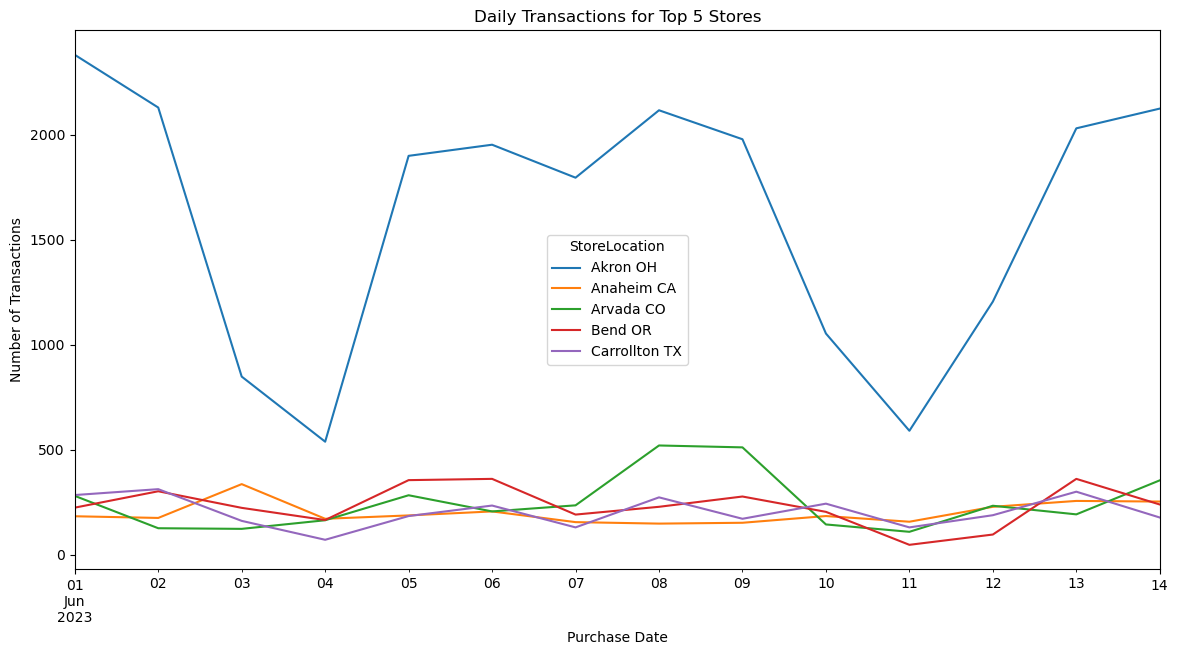

In [4]:
#Analysis 1 - Display sales trends per store

#Convert to datetime
transactions['PurchaseDate'] = pd.to_datetime(transactions['PurchaseDate'])

# Aggregate the number of transactions per store by date
transactions_per_store = transactions.groupby(['StoreID', 'PurchaseDate']).size().reset_index(name='Transactions')

#Determine the top five largest performing stores
top_stores = transactions_per_store.groupby('StoreID')['Transactions'].sum().nlargest(5).index

# Step 3: Filter the data for only the top 5 stores
top_stores_transactions = transactions_per_store[transactions_per_store['StoreID'].isin(top_stores)]

# Step 4: Group by 'StoreID' and 'PurchaseDate' to get daily transactions for each top store
top_stores_daily = top_stores_transactions.groupby(['StoreID', 'PurchaseDate']).sum().reset_index()

# Merge with stores dataframe based on storeID
top_stores_daily = pd.merge(top_stores_daily, stores, on='StoreID')

#Combine both store location columns into one
top_stores_daily['StoreLocation'] = top_stores_daily['StoreCity'] + ' ' + top_stores_daily['StoreState']

top_stores_daily = top_stores_daily.drop(['StoreCity', 'StoreState', 'StoreID'], axis=1)

#print(top_stores_daily)

# Step 5: Pivot the data for plotting
pivot_data = top_stores_daily.pivot(index='PurchaseDate', columns='StoreLocation', values='Transactions')

# Plotting the line chart
pivot_data.plot(kind='line', figsize=(14, 7), title='Daily Transactions for Top 5 Stores')
plt.xlabel('Purchase Date')
plt.ylabel('Number of Transactions')
plt.show()

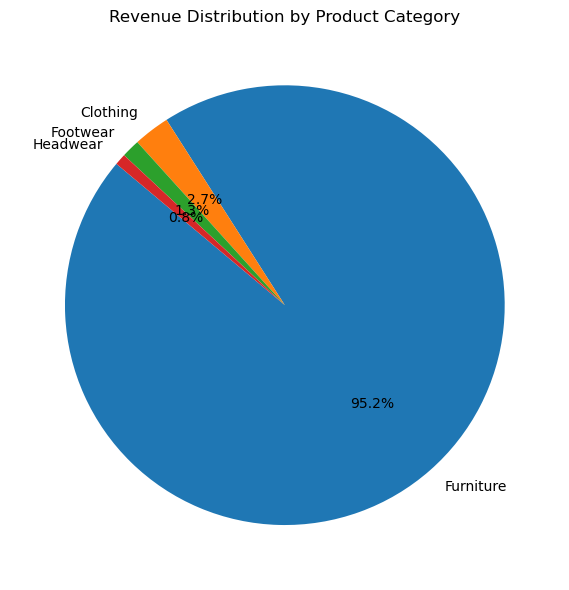

In [5]:
#Analysis 2 - Display overall revenue distribution in pie charts

# Merge transactions with product table
product_revenue = pd.merge(transactions, products, on='ProductID')

product_revenue = product_revenue.drop('Price_y', axis=1)
product_revenue = product_revenue.rename(columns={'Price_x': 'Price'})

product_revenue['Price'] = product_revenue['Price'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'Product Category' column and sum the 'Revenue' column
product_revenue = product_revenue.groupby('ProductCategory')['Price'].sum().reset_index()

# Sort the data by revenue to display the bars in descending order
product_revenue = product_revenue.sort_values('Price', ascending=False)

# Create a pie chart
plt.figure(figsize=(10, 6), dpi=100)  # Set the figure size
plt.pie(product_revenue['Price'], labels=product_revenue['ProductCategory'], autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Revenue Distribution by Product Category')

# Show the chart
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()
#print(product_revenue)


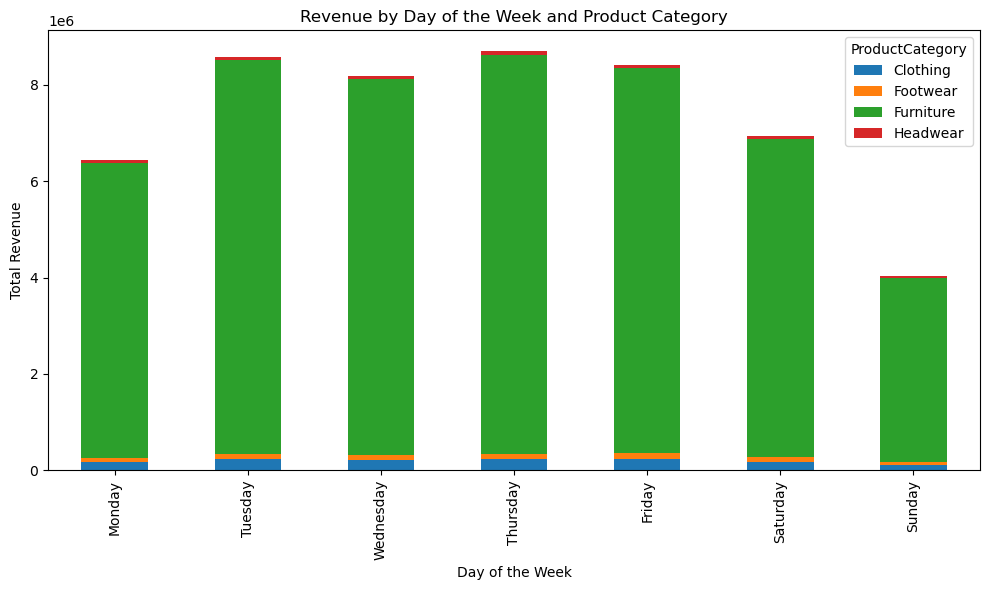

In [9]:
#Analysis 3 - Stacked bar chart by product category by each day of the week
# Merge transactions with product table
product_revenue = pd.merge(transactions, products, on='ProductID')

product_revenue = product_revenue.drop('Price_y', axis=1)
product_revenue = product_revenue.rename(columns={'Price_x': 'Price'})

product_revenue['Price'] = product_revenue['Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'date' to datetime
product_revenue['PurchaseDate'] = pd.to_datetime(product_revenue['PurchaseDate'])

# Extract the day of the week
product_revenue['DayOfWeek'] = product_revenue['PurchaseDate'].dt.day_name()

# Group by 'DayOfWeek' and 'ProductCategory' and sum the 'Revenue'
grouped_data = product_revenue.groupby(['DayOfWeek', 'ProductCategory'])['Price'].sum().reset_index()

# Pivot the data
pivot_data = grouped_data.pivot(index='DayOfWeek', columns='ProductCategory', values='Price').fillna(0)

# Define the correct order for the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the pivot table with the ordered list
pivot_data = pivot_data.reindex(days_order)

# Plot a stacked bar chart with the ordered days of the week
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.title('Revenue by Day of the Week and Product Category')

# Show the chart
plt.tight_layout()
plt.show()